In [297]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import label,regionprops
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import distance

In [298]:
def plot_3d(image, threshold=-300):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
    p = p[:,:,::-1]
    
    verts, faces, x, y = measure.marching_cubes(p, threshold)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.7)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()

## Import de nodule_mask.npzet lung_img.npz

In [299]:
INPUT_FOLDER = '/Users/anthonypamart/Documents/SIR/Projets/CEI/Taff 15 mars/slices'
patients_short = os.listdir(INPUT_FOLDER)

images = os.listdir(INPUT_FOLDER)
images_path = [os.path.join(INPUT_FOLDER,patient) for patient in patients_short]

In [300]:
##TEST
INPUT_FOLDER_TEST = '/Users/anthonypamart/Documents/SIR/Projets/CEI/Taff 15 mars/Test_2eme_CNN'
patients_short_test = os.listdir(INPUT_FOLDER_TEST)

images_test = os.listdir(INPUT_FOLDER_TEST)
images_path_nodule_mask_test = [os.path.join(INPUT_FOLDER_TEST,patient) for patient in patients_short_test]

In [301]:
##TEST 2

LUNG_FOLDER_TEST = '/Users/anthonypamart/Documents/SIR/Projets/CEI/Donnees Kaggle dans UNET/Lung_img dans UNET/'
MASK_FOLDER_TEST = '/Users/anthonypamart/Documents/SIR/Projets/CEI/Donnees Kaggle dans UNET/Mask_Nodule en sortie/'

#lung_short_test = os.listdir(LUNG_FOLDER_TEST)
#mask_short_test = os.listdir(MASK_FOLDER_TEST)

lung_images_test = os.listdir(LUNG_FOLDER_TEST)
mask_images_test = os.listdir(MASK_FOLDER_TEST)

mask_images_test.sort()
del mask_images_test[0] ##Pour supprimer le .DS_Store
lung_images_test.sort()

images_path_lung_img = [os.path.join(LUNG_FOLDER_TEST,lung) for lung in lung_images_test]
images_path_nodule_mask = [os.path.join(MASK_FOLDER_TEST,mask) for mask in mask_images_test]

In [ ]:
##On crée 2 listes dans lesquels on écrit respectivement les paths des lung_img et les paths des nodule_mask 
images_path_lung_img = []
images_path_nodule_mask = []
for i in range(0,len(images_path)):
    if(images_path[i][-19:-8]=='nodule_mask'):
        images_path_nodule_mask.append(images_path[i])
    elif(images_path[i][-16:-8]=='lung_img'):
        images_path_lung_img.append(images_path[i])
    else:
        print(images_path[i])
        
##On sort ces listes pour avoir les slices d'un meme patient côte à côte
images_path_lung_img.sort()
images_path_nodule_mask.sort()

In [296]:
##TEST
images_path_lung_img_test = images_path_lung_img[99:116]
images_path_nodule_mask_test.sort()
#images_path_nodule_mask_test
#images_path_lung_img_test

images_path_lung_img = images_path_lung_img_test[:]
images_path_nodule_mask = images_path_nodule_mask_test[:]

In [ ]:
## Liste des id des patients
id_patients = []
for i in range(0,len(images_path_lung_img)):
    id_patients.append(images_path_lung_img[i][67:131])
id_patients = list(set(id_patients)) ##On tej les doublons

In [ ]:
#plt.imshow(np.load(images_path_nodule_mask[110]), cmap = plt.cm.bone)
#plt.show()

In [ ]:
#plt.imshow(np.load(images_path_lung_img[110]), cmap = plt.cm.bone)
#plt.show()

In [276]:
##PAS A METTRE DANS LE SCRIPT

##On charge nos .npz dans un numpy array

#nodule_mask = np.load(images_path_nodule_mask[110])
#lung_img = np.load(images_path_lung_img[110])

nodule_mask = np.load(images_path_nodule_mask[16])
lung_img = np.load(images_path_lung_img[16])

In [277]:
##TEST
nodule_mask = nodule_mask.reshape((512,512))
lung_img = lung_img.reshape((512,512))

In [278]:
##TEST
for i in range(0, nodule_mask.shape[0]):
    for j in range(0, nodule_mask.shape[1]):
        if(nodule_mask[i][j] < 0.1 or i > 500 or j >500):
            nodule_mask[i][j] = 0
        else:
            nodule_mask[i][j] = 1

## Application d'un nodule_mask à une lung_img.npz

In [279]:
##Applique le nodule_mask au lung_img et renvoie donc le nodule_segmented
def get_nodule_segmented(nodule_mask,lung_img):
    nodule_segmented = lung_img.copy()
    for i in range(0,len(nodule_segmented)):
        for j in range(0,len(nodule_segmented)):
            if(nodule_mask[i][j]==0.0):
                nodule_segmented[i][j]=0.0
    return nodule_segmented

In [280]:
##PAS A METTRE DANS LE SCRIPT
nodule_segmented = get_nodule_segmented(nodule_mask,lung_img)

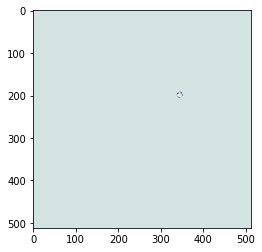

In [281]:
plt.imshow(nodule_segmented, cmap = plt.cm.bone)
plt.show()

In [282]:
##Prend le nodule mask et renvoie les coordonnées des centres des nodules présents et le nb de nodules présents
def get_centers_nodules(nodule_mask):
    label_scan = label(nodule_mask)
    areas = [r.area for r in regionprops(label_scan)]
    #areas.sort()
    center_full = [r.centroid  for r in regionprops(label_scan)]
    nb_nodules = len(center_full)
    return center_full, nb_nodules

In [283]:
"""""
##PAS A METTRE DANS LE SCRIPT

##Calcule le nombre max de nodules dans toutes les slices
a = []
cnt1=0
cnt2=0
cnt=0
for i in range(0,len(images_path_nodule_mask)):
    nodule_mask = np.load(images_path_nodule_mask[i])
    center_full, nb_nodules = get_centers_nodules(nodule_mask)
    a.append(len(center_full))
    if(len(center_full)==1):
       cnt1 += 1
    elif(len(center_full)==2):
       cnt2 += 1
    else:
       cnt += 1
print 'max a = ', max(a)
print 'cnt1 = ', cnt1
print 'cnt2 = ', cnt2
print 'cnt = ', cnt
print(a)
""""""

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-283-e003c2f7992f>, line 24)

In [284]:
##PAS A METTRE DANS LE SCRIPT
center_full, nb_nodules = get_centers_nodules(nodule_mask)

In [287]:
##PAS A METTRE DANS LE SCRIPT

##On prend un patch 2D de taille 16x16 autour de chaque nodule détecté
SIZE_PATCH = 32

##Attention à bien prendre toujours les coordonnees du centre d'un meme nodule, visualisez center_full pour être sur
first_nodule = nodule_segmented[int(center_full[0][0])-SIZE_PATCH/2:int(center_full[0][0])+SIZE_PATCH/2,int(center_full[0][1])-SIZE_PATCH/2:int(center_full[0][1])+SIZE_PATCH/2]
#second_nodule = nodule_segmented[int(center_full[1][0])-SIZE_PATCH/2:int(center_full[1][0])+SIZE_PATCH/2,int(center_full[1][1])-SIZE_PATCH/2:int(center_full[1][1])+SIZE_PATCH/2]

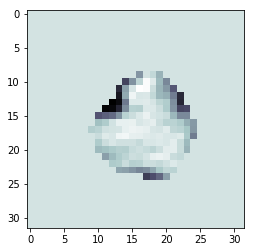

In [288]:
plt.imshow(first_nodule, cmap = plt.cm.bone)
plt.show()

## Passage en 3D

- On prendra tout au long l'exemple du patient dont les slices se retrouvent avec "images_path_nodule_mask[99:116]"
- (on a sorté images_path_nodule_mask au début du notebook)    
- (ID de ce patient : 1.3.6.1.4.1.14519.5.2.1.6279.6001.137763212752154081977261297097), correspond à id_patients[13]

In [130]:
##Pour récupérer le path des lung_img pour le patient dont on précise l'ID
def get_patients_path_lung_img(images_path_lung_img, ID='1.3.6.1.4.1.14519.5.2.1.6279.6001.137763212752154081977261297097'):
    patients_path_lung_img = []
    for i in range(0,len(images_path_lung_img)):
        #if(images_path_lung_img[i][67:131]==id_patients[0]):
        if(images_path_lung_img[i][67:131]==ID):
            patients_path_lung_img.append(images_path_lung_img[i])
    patients_path_lung_img.sort()
    return patients_path_lung_img

In [131]:
##Pour récupérer le path des nodule_mask pour le patient dont on précise l'ID
def get_patients_path_nodule_mask(images_path_nodule_mask, ID='1.3.6.1.4.1.14519.5.2.1.6279.6001.137763212752154081977261297097'):
    patients_path_nodule_mask = []
    for i in range(0,len(images_path_nodule_mask)):
        if(images_path_nodule_mask[i][67:131]==ID):
            patients_path_nodule_mask.append(images_path_nodule_mask[i])
    patients_path_nodule_mask.sort()
    return patients_path_nodule_mask

### Inspection des patients qui ont 2 nodules, pour voir comment sélectionner un de ces 2 nodules

In [ ]:
##PAS A METTRE DANS LE SCRIPT

list_patients_path_nodule_mask = []
for i in range(0, len(id_patients)):
    list_patients_path_nodule_mask.append(get_patients_path_nodule_mask(images_path_nodule_mask, ID=id_patients[i]))

In [ ]:
#for i in range(0, len(list_patients_path_nodule_mask)):
    #print(len(list_patients_path_nodule_mask[i]))

In [ ]:
max([len(list_patients_path_nodule_mask[i]) for i in range(0, (len(list_patients_path_nodule_mask)))])

In [ ]:
##PAS A METTRE DANS LE SCRIPT

b = np.zeros((len(list_patients_path_nodule_mask), max([len(list_patients_path_nodule_mask[i]) for i in range(0, (len(list_patients_path_nodule_mask)))])))
cnt1=[0]*len(list_patients_path_nodule_mask)
cnt2=[0]*len(list_patients_path_nodule_mask)
cnt=[0]*len(list_patients_path_nodule_mask)
for j in range(0, len(list_patients_path_nodule_mask)):
    for i in range(0,len(list_patients_path_nodule_mask[j])):
        nodule_mask = np.load(list_patients_path_nodule_mask[j][i])
        center_full, nb_nodules = get_centers_nodules(nodule_mask)
        b[j][i] = len(center_full)
        if(len(center_full)==1):
           cnt1[j] += 1
        elif(len(center_full)==2):
           cnt2[j] += 1
        else:
           cnt[j] += 1
    #print 'max b = ', max(b[j])
    #print 'cnt1 = ', cnt1[j]
    #print 'cnt2 = ', cnt2[j]
    #print 'cnt = ', cnt[j]
    if max(b[j])==2:
        print(j)
        print(b[j])
        print('---------')

### Fin de l'inspection -> pour slice 0, les patients 6, 8, 13, 29, 30 et 47 ont 2 nodules (6 sur 67)

In [ ]:
##PAS A METTRE DANS LE SCRIPT

patients_path_lung_img = get_patients_path_lung_img(images_path_lung_img, id_patients[6])
patients_path_nodule_mask = get_patients_path_nodule_mask(images_path_nodule_mask, id_patients[6])

#patients_path_lung_img = get_patients_path_lung_img(images_path_lung_img)
#patients_path_nodule_mask = get_patients_path_nodule_mask(images_path_nodule_mask)

In [302]:
##TEST

patients_path_lung_img = images_path_lung_img[:]
patients_path_nodule_mask = images_path_nodule_mask[:]

In [290]:
##Pour le patient pris en exemple, on construit nodule_mask_3D, lung_img_3D et nodule_segmented_3D

##On met en entrée le path des nodule_mask du patient et on a en sortie un np array 3D avec le nodule mask (2D)
##de toutes les slices (ce qui ajoute une 3e dimension)
def get_nodule_mask_3D(patients_path_nodule_mask, dim_x=512, dim_y=512):
    nodule_mask_3D = np.zeros((dim_x, dim_y, len(patients_path_nodule_mask)))
    for i in range(0,len(patients_path_nodule_mask)):
        temp = np.load(patients_path_nodule_mask[i]).reshape(512,512)
        
        for k in range(0, temp.shape[0]):
            for j in range(0, temp.shape[1]):
                if(temp[k][j] < 0.1 or i > 500 or j >500):
                    temp[k][j] = 0
                else:
                    temp[k][j] = 1
        
        nodule_mask_3D[:,:,i] = temp
    
    return nodule_mask_3D

##On met en entrée le path des lung_img du patient et on a en sortie un np array 3D avec la lung_img (2D)
##de toutes les slices (ce qui ajoute une 3e dimension)
def get_lung_img_3D(patients_path_lung_img, dim_x=512, dim_y=512):
    lung_img_3D = np.zeros((dim_x, dim_y, len(patients_path_lung_img)))
    for i in range(0,len(patients_path_lung_img)):
        lung_img_3D[:,:,i] = np.load(patients_path_lung_img[i]) ##Pas ouf de loader à chaque fois ??
    return lung_img_3D

##On met en entrée le path des lung_img du patient et le path des nodule_mask et on a en sortie un np array 3D
##avec le nodule segmenté (2D) de toutes les slices (ce qui rajoute une 3e dimension)
def get_nodule_segmented_3D(patients_path_nodule_mask, patients_path_lung_img, dim_z = len(patients_path_lung_img), dim_x =512, dim_y=512):
    nodule_segmented_3D = np.zeros((dim_x, dim_y, dim_z))
    
    a= min(len(patients_path_lung_img), dim_z)
    for i in range(0,a):
        nodule_segmented_3D[:,:,i] = get_nodule_segmented(get_nodule_mask_3D(patients_path_nodule_mask)[:,:,i],get_lung_img_3D(patients_path_lung_img)[:,:,i])
    return nodule_segmented_3D

In [337]:
%%time
##PAS A METTRE DANS LE SCRIPT
nodule_segmented_3D = get_nodule_segmented_3D(patients_path_nodule_mask[58:90], patients_path_lung_img[58:90])

CPU times: user 9min 40s, sys: 10 s, total: 9min 50s
Wall time: 9min 58s


In [136]:
##On stock les center_full et les nb_nodules dans des listes center_full_3D et nb_nodules_3D

def get_center_nodules_3D(patients_path_nodule_mask):
    center_full_3D = []
    nb_nodules_3D = []

    for i in range(0, len(patients_path_nodule_mask)):
        nodule_mask_3D = get_nodule_mask_3D(patients_path_nodule_mask)
        center_full, nb_nodules = get_centers_nodules(nodule_mask_3D[:,:,i])
        center_full_3D.append(center_full)
        nb_nodules_3D.append(nb_nodules)  
    return center_full_3D, nb_nodules_3D

In [311]:
%%time
##PAS A METTRE DANS LE SCRIPT
center_full_3D, nb_nodules_3D = get_center_nodules_3D(patients_path_nodule_mask[58:90])

CPU times: user 9min 22s, sys: 7.88 s, total: 9min 30s
Wall time: 9min 35s


In [329]:
##TEST2

##Cette façon de sélectionner les différents nodules ne fonctionnent pas dans un cas général

SIZE_PATCH = 32

first_nodule_3D = np.zeros((first_nodule.shape[0], first_nodule.shape[1], 8))
for i in range(0,8):
    if(not(not(center_full_3D[i]))):
        first_nodule_3D[:,:,i] = nodule_segmented_3D[int(center_full_3D[i][0][0])-SIZE_PATCH/2:int(center_full_3D[i][0][0])+SIZE_PATCH/2,int(center_full_3D[i][0][1])-SIZE_PATCH/2:int(center_full_3D[i][0][1])+SIZE_PATCH/2,i]

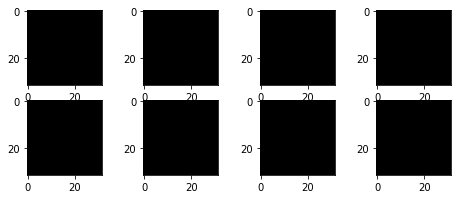

In [330]:
##TEST2
##First Nodule

fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(0,8):
    img = first_nodule_3D[:,:,i]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img, cmap = plt.cm.bone)
plt.show()

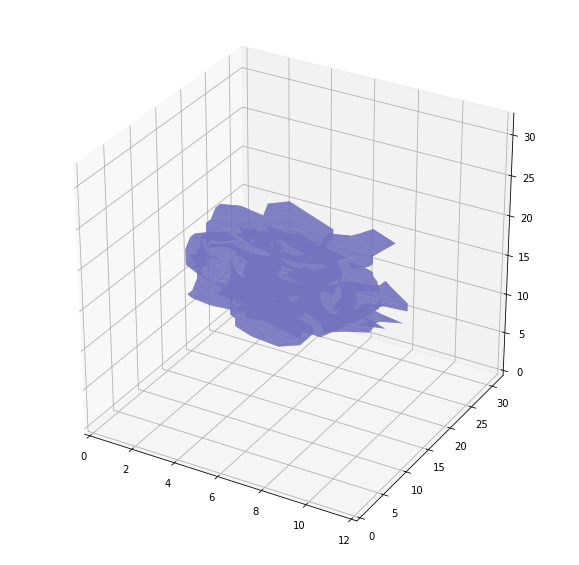

In [204]:
##TEST2
plot_3d(first_nodule_3D, 0) ##Seuil à optimiser

In [ ]:
##PAS A METTRE DANS LE SCRIPT

##Cette façon de sélectionner les différents nodules ne fonctionnent pas dans un cas général

SIZE_PATCH = 32

first_nodule_3D = np.zeros((first_nodule.shape[0], first_nodule.shape[1], len(nb_nodules_3D)))
for i in range(0,len(nb_nodules_3D)):
    first_nodule_3D[:,:,i] = nodule_segmented_3D[int(center_full_3D[i][0][0])-SIZE_PATCH/2:int(center_full_3D[i][0][0])+SIZE_PATCH/2,int(center_full_3D[i][0][1])-SIZE_PATCH/2:int(center_full_3D[i][0][1])+SIZE_PATCH/2,i]
    
#second_nodule_3D = np.zeros((second_nodule.shape[0], second_nodule.shape[1], 17))
#for i in range(4,7):
#    second_nodule_3D[:,:,i] = nodule_segmented_3D[int(center_full_3D[i][-2][0])-8:int(center_full_3D[i][-2][0])+8,int(center_full_3D[i][-2][1])-8:int(center_full_3D[i][-2][1])+8,i]

In [47]:
##First Nodule

fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(0, 17):
    img = first_nodule_3D[:,:,i]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img, cmap = plt.cm.bone)
plt.show()

IndexError: index 10 is out of bounds for axis 2 with size 10

In [ ]:
##Second Nodule

fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(0, 9):
    img = second_nodule_3D[:,:,i]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img, cmap = plt.cm.bone)
plt.show()

In [ ]:
plot_3d(first_nodule_3D, 100) ##Seuil à optimiser

In [ ]:
##Verifier que la fonction fonctionne bien dans le cas general (surtout ligne de construction de first_nodule_3D)
##Voir si on prend bien le nodule le plus pertinent avec cette fonction
##Voir si on prend qu'un seul nodule de taille 16x16x16 (c'est ce que fait cette fonction)
def npz_to_cnn(images_path_lung_img, images_path_nodule_mask, ID, dimx_nodule = 16, dimy_nodule = 16, dimz_nodule = 16):
    patients_path_lung_img = get_patients_path_lung_img(images_path_lung_img, ID)
    patients_path_nodule_mask = get_patients_path_nodule_mask(images_path_nodule_mask, ID)
    nodule_segmented_3D = get_nodule_segmented_3D(patients_path_nodule_mask, patients_path_lung_img, dimz_nodule)
    center_full_3D, nb_nodules_3D = get_center_nodules_3D(patients_path_nodule_mask)
    a = min(len(center_full_3D), dimz_nodule)
        
    ##Si les éléments de center_full_3d sont trop éloignés, cela veut surement dire qu'on a confondu 2 nodules
    ##lorsqu'on a pris les 2 plus grandes areas dans le preprocessing (esperons que ca n'arrive pas)
    for i in range(0, len(center_full_3D)):
        print(center_full_3D[i]) 
    
    #first_nodule_3D = np.zeros((dimx_nodule, dimy_nodule, len(nb_nodules_3D)))
    first_nodule_3D = np.zeros((dimx_nodule, dimy_nodule, dimz_nodule)) 
    
    #for i in range(0,len(nb_nodules_3D)):
    for i in range(0,a):
        first_nodule_3D[:,:,i] = nodule_segmented_3D[int(center_full_3D[i][-1][0])-dimx_nodule/2:int(center_full_3D[i][-1][0])+dimx_nodule/2,int(center_full_3D[i][-1][1])-dimy_nodule/2:int(center_full_3D[i][-1][1])+dimy_nodule/2,i]
    return first_nodule_3D, center_full_3D

In [ ]:
%%time
#first_nodule_3D = npz_to_cnn(images_path_lung_img, images_path_nodule_mask, '1.3.6.1.4.1.14519.5.2.1.6279.6001.137763212752154081977261297097')
#print(first_nodule_3D.shape)

In [ ]:
%%time

nodule_3D, center_full_3D = npz_to_cnn(images_path_lung_img, images_path_nodule_mask, id_patients[29])
#plot_3d(nodule_3D)

- Problème 1) se met en évidence en printant les center_full_3D de id_patients[8] et de '1.3.6.1.4.1.14519.5.2.1.6279.6001.137763212752154081977261297097' par exemple :
- On remarque que quand on a 2 nodules, ils sont classés dans center_full par ordre croissant (je pense) selon la premiere coordonnées
- Ca fout le bordel et mon -1 dans center_full_3D[i][-1][0] n'est pas bon
- Vu qu'il y a peu de gens qui ont 2 nodules, à voir comment on règle ça
- Sinon on sélectionne le nodule qui apparait dans le plus de slice ?
- Ou on peut sélectionner le nodule qui a l'area la plus importante toutes slices confondues ?


- Problème 2) le fait que dans le preprocessing, on selectionne uniquement les deux plus grosses areas d'une slice fausse la détection 3D des nodules (sur une slice, les 2 plus gros nodules ne sont pas forcément ceux qui ont la plus grosse area sur la slice en question, ça dépend si la slice les coupe en plein milieu ou au niveau d'une extremité)

## Implémentation du CNN

In [339]:
from keras import layers
from keras import models
from keras import optimizers

/Users/anthonypamart/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [370]:
from CNN_Classification import CNN_Classification

In [371]:
model = CNN_Classification()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_21 (Conv3D)           (None, 30, 30, 30, 32)    896       
_________________________________________________________________
max_pooling3d_21 (MaxPooling (None, 15, 15, 15, 32)    0         
_________________________________________________________________
conv3d_22 (Conv3D)           (None, 13, 13, 13, 64)    55360     
_________________________________________________________________
max_pooling3d_22 (MaxPooling (None, 6, 6, 6, 64)       0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 6, 6, 6, 64)       0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dense_28 (Dense)             (None, 216)               2986200   
__________

In [358]:
#train_images = np.reshape(first_nodule_3D, (1,32,32,32,1))
train_images = np.reshape(np.zeros((32,32,32)), (1,32,32,32,1))
train_labels = np.zeros((1,1)) ##Foireux, à modifier, mais le réseau voulait ce shape
model.fit(train_images, train_labels, epochs=5, batch_size=1)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 0.6931
Epoch 2/5
1/1 [==============================] - 0s 433ms/step - loss: 0.6926
Epoch 3/5
1/1 [==============================] - 0s 432ms/step - loss: 0.6921
Epoch 4/5
1/1 [==============================] - 0s 467ms/step - loss: 0.6916
Epoch 5/5
1/1 [==============================] - 1s 511ms/step - loss: 0.6911
